In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D
from matplotlib import pyplot as plt
import numpy as np

# load mnist data
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

print("Dimension of training data: ", x_train_raw.shape)
print("Dimension of test data: ", x_test_raw.shape)
print('Training label:', np.unique(y_train_raw))

Dimension of training data:  (60000, 28, 28)
Dimension of test data:  (10000, 28, 28)
Training label: [0 1 2 3 4 5 6 7 8 9]


In [3]:
from mindspore import context

context.set_context(mode=context.GRAPH_MODE, device_target="CPU")

In [4]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)

print("Example : ")
print("Label before conversion: ", y_train_raw[0])
print("Label after conversion: ", y_train[0])


Example : 
Label before conversion:  5
Label after conversion:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


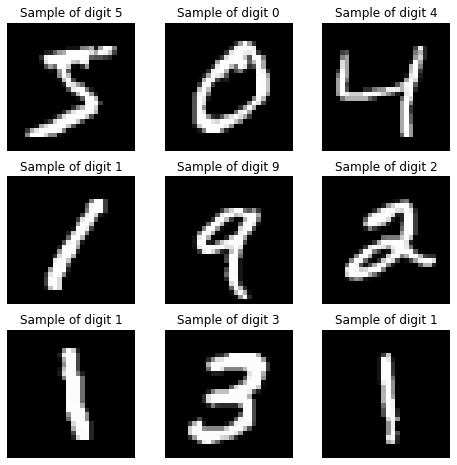

In [5]:
# plot some samples
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i], cmap="gray")
    plt.title("Sample of digit " + str(y_train_raw[i]))
    plt.axis("off")

In [6]:
# reshape the data
# Convert a 28 x 28 image into a 784 x 1 vector.
x_train = x_train_raw.reshape([x_train_raw.shape[0], 
                               x_train_raw.shape[1]*x_train_raw.shape[2]])
x_test = x_test_raw.reshape([x_test_raw.shape[0], 
                             x_test_raw.shape[1]*x_test_raw.shape[2]])

# normalize image pixel value
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

print("Dimension of training data: ", x_train.shape)
print("Dimension of test data: ", x_test.shape)

Dimension of training data:  (60000, 784)
Dimension of test data:  (10000, 784)


In [7]:
input_shape = (x_train.shape[1],)
model = tf.keras.Sequential([
    Dense(units=512, activation="relu", input_shape=input_shape),
    Dense(units=256, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=num_classes, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [8]:
use_optimizers = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=use_optimizers,
             metrics=["accuracy"])

In [9]:
model.fit(x_train, y_train,
         batch_size=128,
         epochs=10,
         verbose=1)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.2316 - accuracy: 0.9320
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0858 - accuracy: 0.9731
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0556 - accuracy: 0.9819
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0399 - accuracy: 0.9877
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0291 - accuracy: 0.9904
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0287 - accuracy: 0.9907
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0214 - accuracy: 0.9931
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0134 - accuracy: 0.9952

In [11]:
model.save('E:\Ai/model_dnn.h5')

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

input_shape1 = (28, 28, 1)
model1 = keras.Sequential() # Create a network sequence.

# Add the first convolutional layer and pooling layer.
model1.add(Conv2D(filters=32, kernel_size=5, strides=(1,1), padding="same", activation="relu", input_shape=input_shape1))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding = "valid"))

# Add the second convolutional layer and pooling layer.
model1.add(Conv2D(filters=64, kernel_size=3, strides=(1,1), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2), strides =(2,2), padding="valid"))

# Add a dropout layer to reduce overfitting.
model1.add(Dropout(0.25))
model1.add(Flatten())
# model1.add(GlobalAveragePooling2D())
# model1.add(GlobalMaxPooling2D())

# Add two fully connected layers.
model1.add(Dense(units=128, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(units=10, activation="softmax"))


In [14]:
X_train = x_train.reshape(60000, 28, 28, 1)
X_test = x_test.reshape(10000, 28, 28, 1)

model1.compile(optimizer="adam",
              loss="categorical_crossentropy", 
               metrics=['accuracy'])

In [15]:
history = model1.fit(x=X_train, y=y_train, 
                    epochs=5, 
                    batch_size=128)

Epoch 1/5
469/469 [==============================] - 34s 69ms/step - loss: 0.2704 - accuracy: 0.9146
Epoch 2/5
469/469 [==============================] - 30s 64ms/step - loss: 0.0882 - accuracy: 0.9740
Epoch 3/5
469/469 [==============================] - 29s 62ms/step - loss: 0.0675 - accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 29s 62ms/step - loss: 0.0541 - accuracy: 0.9837
Epoch 5/5
469/469 [==============================] - 30s 63ms/step - loss: 0.0483 - accuracy: 0.9856


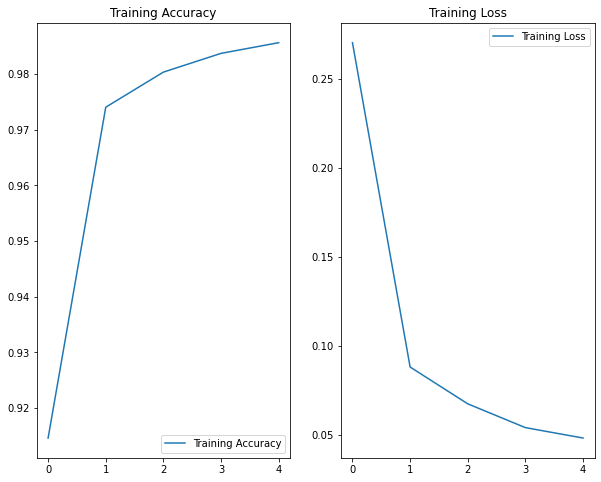

In [16]:
epochs=5

# get training statistics
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss=history.history['loss']
# val_loss=history.history['val_loss']

epochs_range = range(epochs)

# plot training result
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [17]:
test_loss, test_acc = model1.evaluate(x=X_test, y=y_test)
print("Test Accuracy %.2f"%test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0250 - accuracy: 0.9913
Test Accuracy 0.99


In [18]:
model.save('E:\Ai/model_cnn.h5')